# Vaccination Rates and Socioeconomic Status in BC

### Project authors:

### Created on: Sept 23, 2021

### Last modified on: Sept 23, 2021

This notebook is for wranging vaccination data from the [BCCDC regional surveillance dashboard](http://www.bccdc.ca/health-professionals/data-reports/covid-19-surveillance-dashboard).

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part I: Data exploration

In [2]:
lha_df = pd.read_csv('../data/BCCDC_COVID19_LHA_Data.csv')
lha_df.columns

Index(['LHA18_Code', 'LHA18_Name', 'C_ADR_7day', 'C_ADR_8_14day',
       'C_ADR_7day_change', '7d_positivity_all', '7d_positivity_public',
       'D1_12_coverage', 'D1_12_17_coverage', 'D1_18_coverage',
       'D1_18_49_coverage', 'D1_50_coverage', 'D2_12_coverage',
       'D2_12_17_coverage', 'D2_18_coverage', 'D2_18_49_coverage',
       'D2_50_coverage'],
      dtype='object')

Let's add a column for the health authority (Interior, Fraser, Coastal, Island or Northern)

In [3]:
# The first digit of the 'LHA18_Code' column indicates the health authority
lha_df['ha'] = lha_df.LHA18_Code.astype(str).str[:1]
# This dictionary converts the health authority numbers to words
ha_dict = {'1':'Interior', '2':'Fraser', '3':'Coastal', '4':'Island', 
'5':'Northern'}
# Replace the health authority number column that we created with the actual
# names of the health authorities.
lha_df = lha_df.replace({'ha': ha_dict})


In [4]:
lha_df.columns

Index(['LHA18_Code', 'LHA18_Name', 'C_ADR_7day', 'C_ADR_8_14day',
       'C_ADR_7day_change', '7d_positivity_all', '7d_positivity_public',
       'D1_12_coverage', 'D1_12_17_coverage', 'D1_18_coverage',
       'D1_18_49_coverage', 'D1_50_coverage', 'D2_12_coverage',
       'D2_12_17_coverage', 'D2_18_coverage', 'D2_18_49_coverage',
       'D2_50_coverage', 'ha'],
      dtype='object')

How much missing data is there?

In [5]:
lha_df.isna().sum()

LHA18_Code              0
LHA18_Name              0
C_ADR_7day              0
C_ADR_8_14day           0
C_ADR_7day_change       0
7d_positivity_all       0
7d_positivity_public    0
D1_12_coverage          0
D1_12_17_coverage       0
D1_18_coverage          0
D1_18_49_coverage       0
D1_50_coverage          0
D2_12_coverage          0
D2_12_17_coverage       0
D2_18_coverage          0
D2_18_49_coverage       0
D2_50_coverage          0
ha                      0
dtype: int64

Sweet! All complete!

## Part II: Data visualization

Let's look at how the distributions of the percent of vaccinated individuals who are at least 12 overlap between health authorities.

<Figure size 720x720 with 0 Axes>

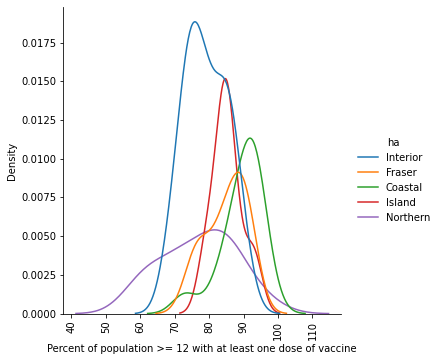

In [6]:
plt.figure(figsize = (10,10))
sns.displot(data = lha_df, x = 'D1_12_coverage', hue='ha', kind = 'kde')
plt.xticks(rotation = 'vertical')
plt.ylabel('Density')
plt.xlabel('Percent of population >= 12 with at least one dose of vaccine')
plt.show()

There's a lot of difference here between the health authorities. Let's see how they stack up with a boxplot so we can view medians and quartiles.

<Figure size 432x288 with 0 Axes>

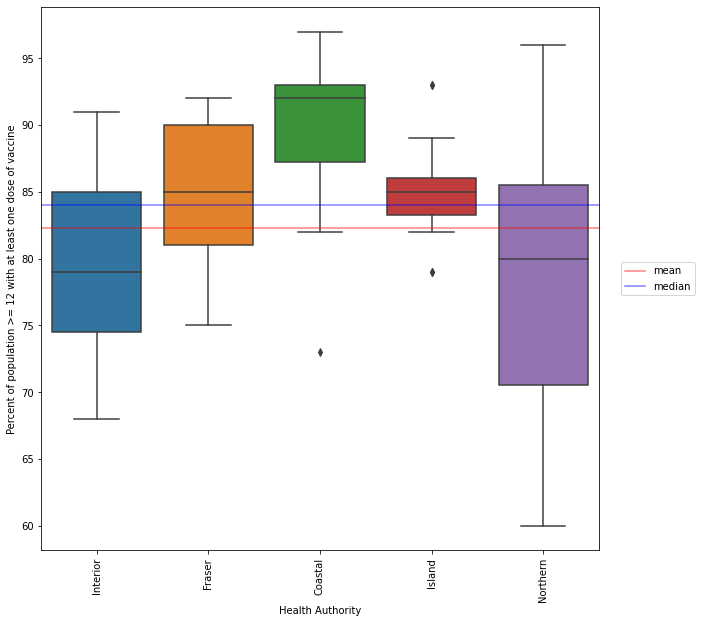

In [7]:
plt.clf()
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x= 'ha', y='D1_12_coverage', data = lha_df)
plt.xticks(rotation = 'vertical')
plt.xlabel('Health Authority')
plt.ylabel('Percent of population >= 12 with at least one dose of vaccine')
# mean among all local health authorities is red horizontal line
plt.axhline(y=lha_df.D1_12_coverage.mean(), color = 'r', alpha = 0.5, label = 'mean')
# median among all local health authorities is blue horizontal line
plt.axhline(y=lha_df.D1_12_coverage.median(), color = 'b', alpha = 0.5, label = 'median')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

The difference here is even more visible. We should perform some stats to see if the differences are significant.

In [8]:
# Break down dataframe by age
# First subset the columns we want
age_df = lha_df[['ha', 'LHA18_Name', 'D1_12_17_coverage','D1_18_49_coverage', 'D1_50_coverage']]
# Then melt for easier plotting
age_df = age_df.melt(id_vars = ['ha', 'LHA18_Name'])
# Rename columns
age_df.columns = ['ha', 'LHA18_Name', 'age', 'coverage']
age_df.head()

,ha,LHA18_Name,age,coverage
0,Interior,Fernie,D1_12_17_coverage,70
1,Interior,Cranbrook,D1_12_17_coverage,68
2,Interior,Kimberley,D1_12_17_coverage,75
3,Interior,Windermere,D1_12_17_coverage,71
4,Interior,Creston,D1_12_17_coverage,47


In [9]:
# rename entries in 'age' column so they are more legible
age_dict = {'D1_12_17_coverage':'12-17', 'D1_18_49_coverage':'18-49', 'D1_50_coverage':'50+'}
age_df = age_df.replace({'age': age_dict})

Now we have a reasonable datframe that we can use to examine differences in vaccination across health authorities between age groups. Let's create a boxplot.

<Figure size 432x288 with 0 Axes>

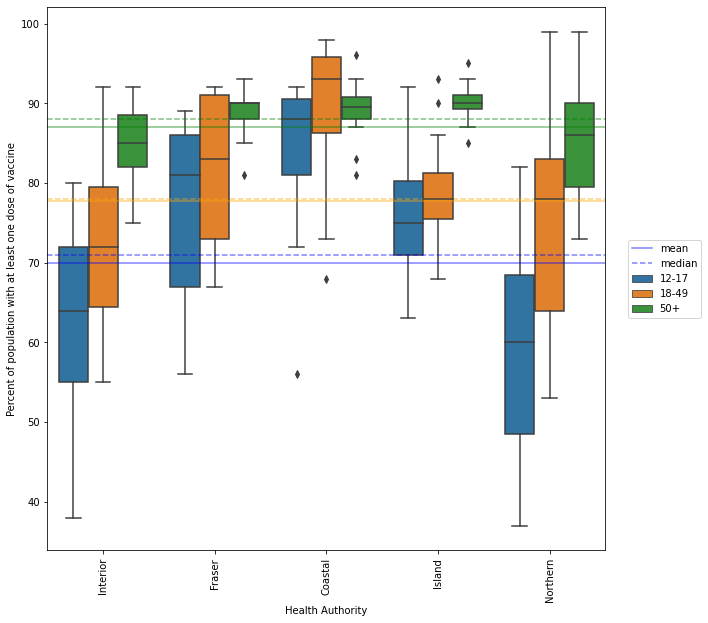

In [10]:
plt.clf()
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x= 'ha', y='coverage', hue = 'age', data = age_df)
plt.xticks(rotation = 'vertical')
plt.xlabel('Health Authority')
plt.ylabel('Percent of population with at least one dose of vaccine')
# plot mean and median for each age group 
plt.axhline(y=lha_df.D1_12_17_coverage.mean(), color = 'b', alpha = 0.5, linestyle = '-', label = 'mean')
plt.axhline(y=lha_df.D1_12_17_coverage.median(), color = 'b', alpha = 0.5, linestyle = '--', label = 'median')
plt.axhline(y=lha_df.D1_18_49_coverage.mean(), color = 'orange', alpha = 0.5, linestyle = '-')
plt.axhline(y=lha_df.D1_18_49_coverage.median(), color = 'orange', alpha = 0.5, linestyle = '--')
plt.axhline(y=lha_df.D1_50_coverage.mean(), color = 'green', alpha = 0.5, linestyle = '-')
plt.axhline(y=lha_df.D1_50_coverage.median(), color = 'green', alpha = 0.5, linestyle = '--')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

## Part III: Data interpretation

What does the chart tell you, relative to the original question.